## Introduction to Deep Learning and Keras

* What is deep learning
* Why would it work
* Install keras
* Your first deep learning program
* Introduction to deep learning applications
    - Convolutional neural network (CNN, or ConvNet)
    - Autoencoder (unsupervised learning)

### What is deep learning

* It is an automatic algorithm that mimics human perception inspired by our brain and the connection between neurons.
* Most deep learning methods use neural network architecture. That is why deep learning is often referred to as "deep neural networks. 
* It is known as "deep" in reference to the layers that these neural networks have.
* In general Deep Learning are Neural networks with <b><u>more than one hidden layer</u></b>

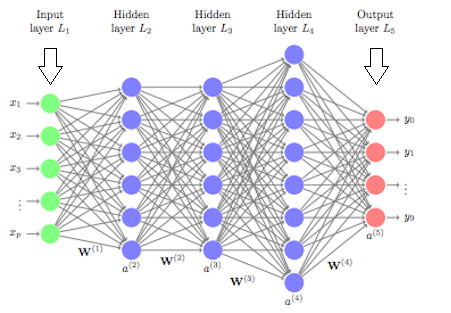

### So why would the multiple hidden layers be useful?

* Deep learning methods are representation-learning methods with multiple levels of representation
* Compose simple but non-linear modules that each transform the representation at one level (starting with the raw input) into a representation at a higher, slightly more abstract level.
* With the composition of enough such transformations, very complex functions can be learned. Higher layers of representation amplify aspects of the input that are important for discrimination and suppress irrelevant variations.


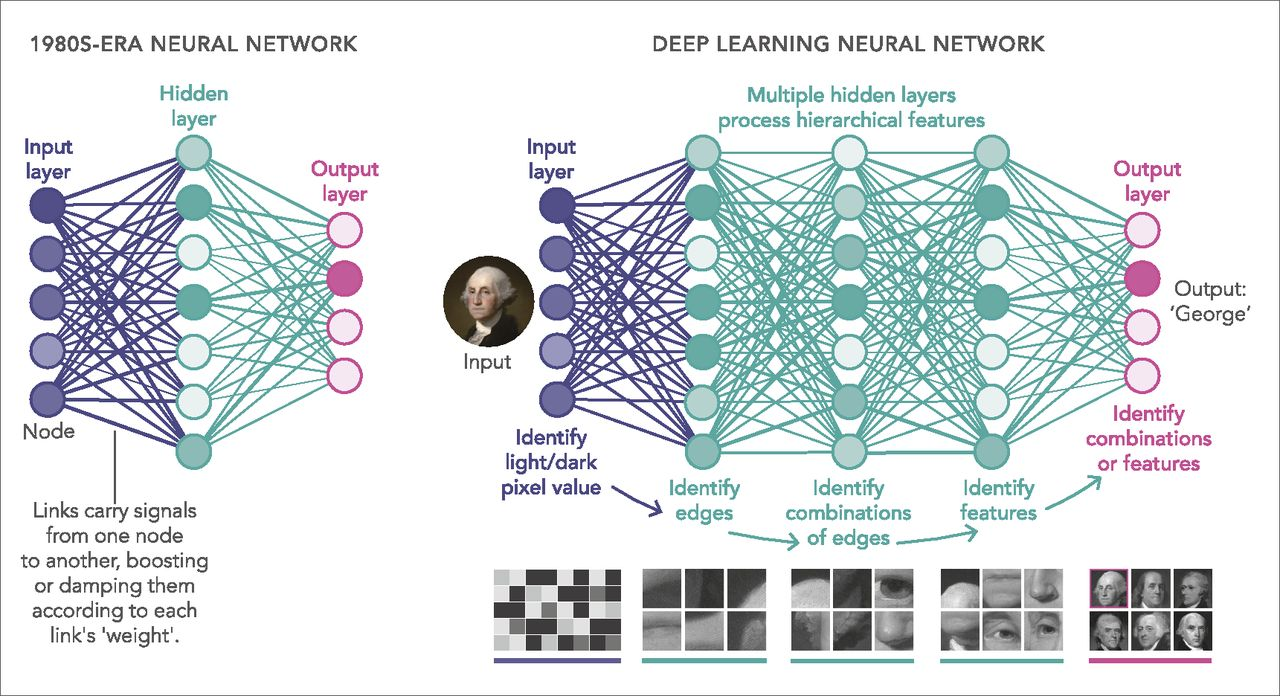

* This multi-layered strategy allows deep learning models to <b><u>extract features that usually a manual work by data scientists, then complete classification</u></b>

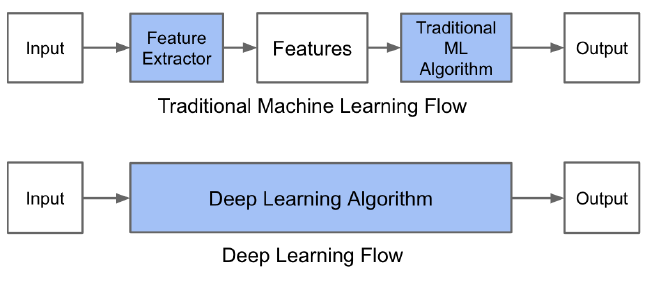

### Keras

* Keras is a simple-to-use but powerful deep learning library for Python
* A high-level, intuitive API for Deep Learning
* Easy to define neural networks, then automatically handles execution.
* A simple, modular interface which allows focus on learning and enables fast experimentation.

because

* It is actually a user-friendly wrapper on top of tensorflow
* It hides the low level details and make the deep learning easier to build
* But it also hides those fine tuning on tensorflow

In [1]:
# !pip install keras==2.3.1

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [3]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize

#### mnist is a dataset of 28x28 images of handwritten digits and their labels. Now we unpack images to x_train/x_test and labels to y_train/y_test

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()  
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

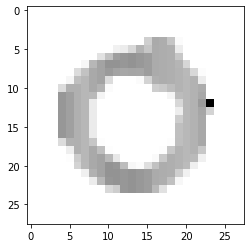

In [28]:
from random import randint
from matplotlib import pyplot

%matplotlib inline

# protip - visually inspect your data
i = randint(0, x_train.shape[0])
pyplot.imshow(x_train[i], cmap='gray_r');

#### Normalize the data. In this case it is simply divide by 255 because the pixel has the value range [0, 255]

<font color='red'>Warning: the below is a wrong way to normalize train and test datasets seperately. They may end up with in different scale. But in this example it is ok because the min is 0 and max is 255 so the two datasets will have the same scale.</font>

In [7]:
x_train = normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = normalize(x_test, axis=1)  # scales data between 0 and 1
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### build a basic feedforward model

In [8]:
model = Sequential()

#### takes our 28x28 and makes it 1x784 to feed the input layer

In [9]:
model.add(Flatten()) 

#### Build two hidden layers
* each layer is a simple fully-connected layer, 128 neurons
* The activation function is relu, short for rectified linear. Currently, relu is the activation function you should just default to. There are many more to test for sure, but, if you don't know what to use, use relu to start
* The output of relu is ƒ(x) = max(0,x).

In [10]:
model.add(Dense(128, activation=tf.nn.relu)) 
model.add(Dense(128, activation=tf.nn.relu))  

#### Build the output layers. 10 units for 10 classes. Softmax for probability distribution
* softmax converts neural activation to probability of category

In [11]:
model.add(Dense(10, activation=tf.nn.softmax))  

### Same as tensorflow, you need to provide the loss function and optimizer. Here we use SGD and categorical_crossentropy.

#### A lot of losses to choose from at https://keras.io/api/losses/

* Probabilistic losses
    - BinaryCrossentropy class
    - CategoricalCrossentropy class
    - SparseCategoricalCrossentropy class
    - Poisson class
    - binary_crossentropy function
    - categorical_crossentropy function
    - sparse_categorical_crossentropy function
    - poisson function
    - KLDivergence class
    - kl_divergence function
    - etc...
    
* difference between sparse_categorical_crossentropy and categorical_crossentropy
    * categorical_crossentropy (cce) uses a one-hot array to calculate the probability,
    * sparse_categorical_crossentropy (scce) uses a category index
    
### Available optimizers at https://keras.io/api/optimizers/
* SGD
* RMSprop
* Adam
* Adadelta
* Adagrad
* Adamax
* Nadam
* Ftrl

In [12]:
model.compile(optimizer='sgd', # usually we use 'adam' as default to start with. Now we use sgd to compare with last week's model
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])  # what to track

#### Now it's ready to train

In [13]:
model.fit(x_train, y_train, epochs=3) #repeat 3 times

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 127us/sample - loss: 1.0557 - acc: 0.7499
Epoch 2/3
60000/60000 [==============================] - 20s 341us/sample - loss: 0.3918 - acc: 0.8892
Epoch 3/3
60000/60000 [==============================] - 10s 167us/sample - loss: 0.3207 - acc: 0.9086


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#### Predict and evaluate. 

In [15]:
pred=model.predict(x_test)
val_loss, val_acc = model.evaluate(x_test, y_test)  
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 2s 198us/sample - loss: 0.2916 - acc: 0.9183
0.2915585254073143
0.9183


prediction 1


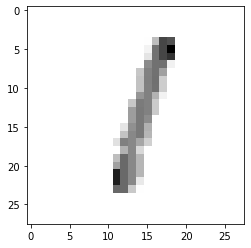

In [37]:
index=5453
pyplot.imshow(x_test[index], cmap='gray_r')
print("prediction", max([(v, k) for k, v in enumerate(pred[index])])[1])

### Introduction to deep learning applications

#### 1. Convolutional Neural Networks

* A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other

* Mimic human brain. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field.

* A collection of such fields overlap to cover the entire visual area.

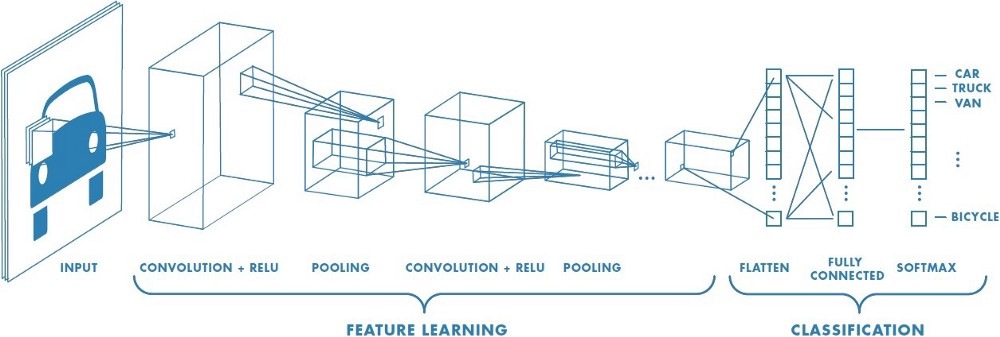

#### What problems is CNN trying to solve?

* In the above deep learning example, we flatten the image matrix like

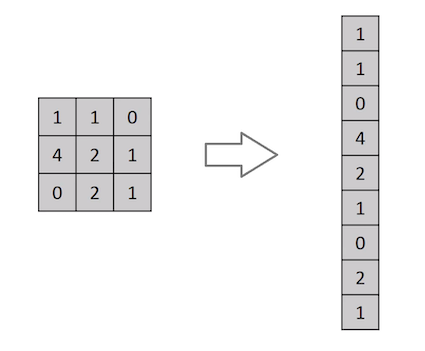

* Then we use the array to classify the digits.
* But the flattened array lost the information of the spatial and temporal dependencies in an image such as edges, color, gradient orientation
* CNN is trying to capture the dependency information and bring them to classification

#### Convolution Layer

* Convolution is the first layer to extract features from an input image. 
* Convolution preserves the relationship between pixels by learning image features using small squares of input data. 
* It is a mathematical operation that takes two inputs such as image matrix and a filter or kernel.

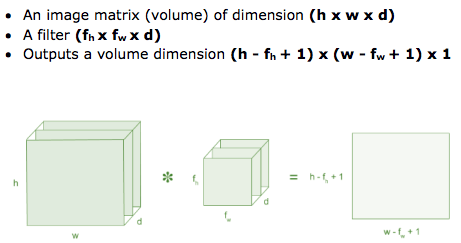

#### For example, 

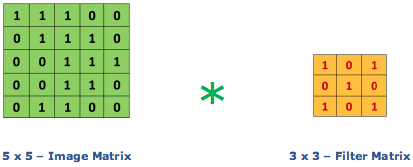

#### The convolution of 5 x 5 image matrix multiplies with 3 x 3 filter matrix which is called “Feature Map” as output shown in below

<img src="https://tinyurl.com/y58lwnn8" align="center">

Then the convolution layer looks like

<img src="https://tinyurl.com/y4qrfve3" align="center">

#### Pooling layer

* Pooling layer is responsible for reducing the spatial size of the Convolved Feature
* Similar to save an image into a smaller size such as thumbnail view.
* There are two types of Pooling: 
    * Max Pooling and Average Pooling. Max Pooling returns the maximum value from the portion of the image covered by the Kernel. 
    * Average Pooling returns the average of all the values from the portion of the image covered by the Kernel.
    
#### Example, 3x3 max pooling over 5x5 convolved feature
<img src="https://tinyurl.com/y6lcu33d" align="center">

#### So the CNN sequence to classify handwritten digits is

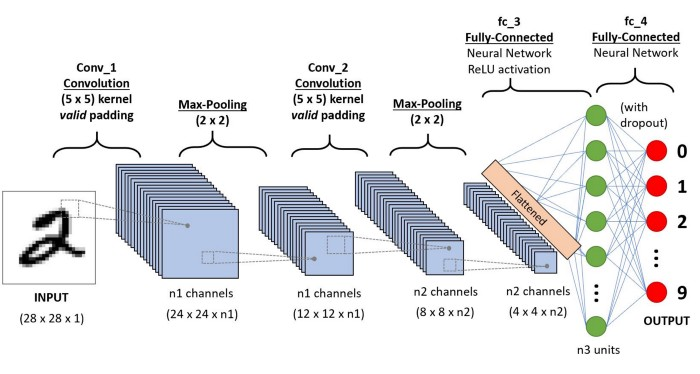

* So the basic steps are
    - Provide input image into convolution layer
    - Choose parameters, apply filters with strides, padding if requires. Perform convolution on the image and apply ReLU activation to the matrix.
    - Perform pooling to reduce dimensionality size
    - Add as many convolutional layers until satisfied
    - Flatten the output and feed into a fully connected layer (FC Layer)
    - Output the class using an activation function (Logistic Regression with cost functions) and classifies images.

#### 2. Autoencoders

* Autoencoder, by design, reduces data dimensions by learning how to ignore the noise in the data.
* Unsupervised learning. The target is itself.
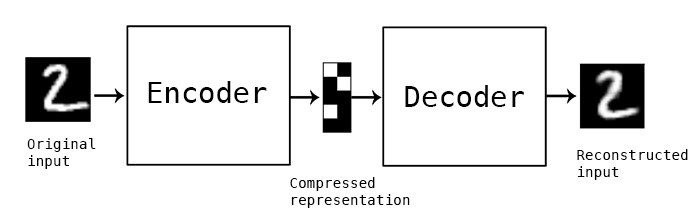

* What we really want is the layer in the middle
* The encoding process compresses the input values to get to the core layer. 
* The decoding process reconstructs the information to produce the outcome.

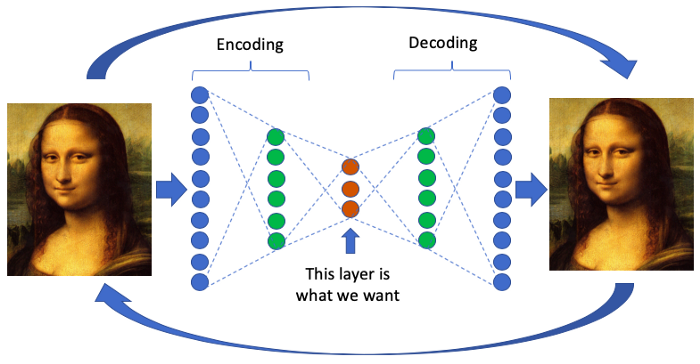

#### Autoencoders consists of 4 main parts:
* Encoder: In which the model learns how to reduce the input dimensions and compress the input data into an encoded representation.
* Bottleneck: which is the layer that contains the compressed representation of the input data. This is the lowest possible dimensions of the input data.
    - Which means that if we just keep the information in the middle layer, we can use it to restore the image.
* Decoder: In which the model learns how to reconstruct the data from the encoded representation to be as close to the original input as possible.
* Reconstruction Loss: This is the method that measures measure how well the decoder is performing and how close the output is to the original input.


The training then involves using back propagation in order to minimize the network’s reconstruction loss.

* Other autoencoder applications

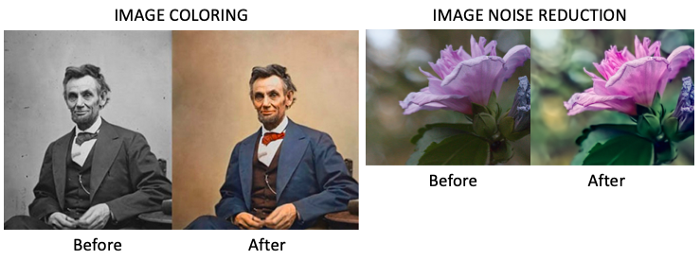

References:

https://www.datacamp.com/community/tutorials/deep-learning-python

https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

https://drive.google.com/file/d/1AGuKRLssV0bjXrV7YNzwKGuHUzExS0jF/view

https://github.com/brianspiering/keras-intro/blob/master/keras-intro.ipynb

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148

https://www.datacamp.com/community/tutorials/autoencoder-keras-tutorial

https://victorzhou.com/blog/keras-cnn-tutorial/

https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726